In this example, we will implement a simple example of active transport. This particular model is derived from work by Jönsson et al. (2006) describing the transport of auxin. We refer to it as "transport against the gradient" because it assumes that cells are somehow able to sense difference in auxin concentrations relative to their neighbors and relocate their auxin pumps to transport auxin towards cells of higher concentrations, i.e. the opposite direction of spontaneous diffusion/passive transport.

# Preparation

We start with activating matplotlib's notebook mode to make visualizations interactive.

In [1]:
%matplotlib notebook

/home/jl/Library/Python/2.7/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


# Imports
We are obviously going to need multicell, but we are also going to need numpy to initialize the system with random noise.

In [2]:
import multicell
import numpy as np

# Problem definition

The tissue will be a 30x30 cubic grid.

In [3]:
sim = multicell.simulation_builder.generate_cell_grid_sim(30, 30, 1)

Topomesh importation: started
- setting mesh
- setting pos
- updating properties
Topomesh importation: finished (0.83 s)


We define one variable called a, for auxin.

In [4]:
sim.register_cell_variable("a")

We then define the differential equation of a. This requires defining some constants and their values.

In [5]:
sim.set_constants({"D_a": 0.09, "T_a": 1., "A": 0., "gamma_a":0.})

def da_dt(simulation, a, A, gamma_a, D_a, T_a, adjacency_matrix, **kwargs):
    return simulation.diffusion(D_a, a, adjacency_matrix) + simulation.transport_against_gradient(T_a, a, adjacency_matrix) + A - gamma_a * a

sim.set_ODE("a", da_dt)

If we started with perfectly uniform concentrations, there would be no differences in concentrations between cells at all, and the system would remain in that unstable steady state. To break this symmetry, we initialize the system with some random noise.

We first need to signal the simulation that all variables have been defined and that arrays can now be reserved for their values.

In [6]:
sim.initialize_cell_variables()

We then create a numpy aray of random values between 0.999 and 1.001 to serve as initial concentration values.

In [7]:
a0 = np.random.uniform(0.999, 1.001, sim.n_cells)
sim.set_cell_variable("a", a0)

Finally, we set the duration of the simulation to 1e6 time units.

In [8]:
sim.set_duration(1e6)

# Simulation

We can then run the simulation.

In [9]:
sim.simulate()

Jacobian computation: started
Jacobian computation: finished (3.16 s)
Excess work done on this call (perhaps wrong Dfun type).
Run with full_output = 1 to get quantitative information.
Integration of the ODE system: 1240.40155602 seconds


# Display

The result can be visualized by registering a viewer and using it to display values of a.

<IPython.core.display.Javascript object>


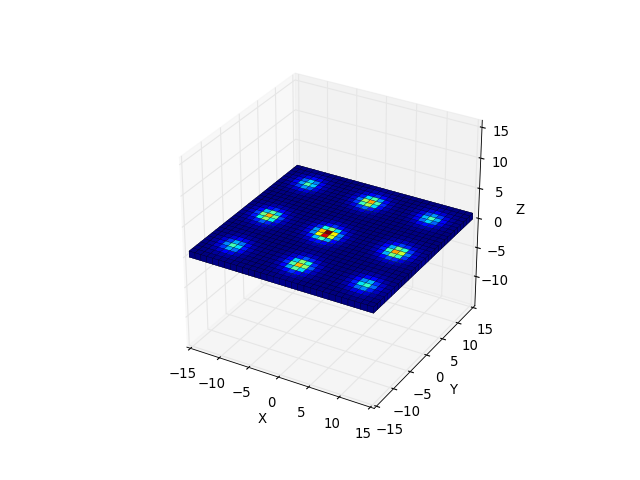

a: from 0.00631291411089 to 15.5263209623
Max value displayed for a: 15.5263209623


In [10]:
sim.register_renderer(multicell.rendering.MatplotlibRenderer, "a")
sim.renderer.display("a")